 This notebook can be used to visualize the different data used for training and testing

In [15]:
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt

## Gaia Data

In [14]:
data_dir = '../data/Gaia DR3/gaia_lm_m_stars.parquet'
data = pd.read_parquet(data_dir)
data.head(5)

,source_id,teff_gspphot,logg_gspphot,mh_gspphot,spectraltype_esphs,Cat,flux
0,466475508969557888,18411.494141,3.5385,-0.3139,B,M,"[1.4043112e-15, 1.3886055e-15, 1.3119094e-15, ..."
1,3325513363920961408,16151.836914,3.7164,0.0395,B,M,"[1.4678052e-15, 1.3982165e-15, 1.3334084e-15, ..."
2,3375508943611375488,18823.841797,3.4316,0.2918,B,M,"[1.0764202e-15, 1.0605224e-15, 1.0162869e-15, ..."
3,4063973032805550592,15295.044922,3.4026,0.0999,G,M,"[9.53517e-16, 9.214246e-16, 8.3622285e-16, 7.9..."
4,454379128715344896,13149.229492,3.8305,-0.9505,B,LM,"[6.8294334e-16, 6.693247e-16, 6.1780524e-16, 5..."


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17627 entries, 0 to 17626
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   source_id           17627 non-null  int64  
 1   teff_gspphot        17627 non-null  float32
 2   logg_gspphot        17627 non-null  float32
 3   mh_gspphot          17627 non-null  float32
 4   spectraltype_esphs  17627 non-null  object 
 5   Cat                 17627 non-null  object 
 6   flux                17627 non-null  object 
dtypes: float32(3), int64(1), object(3)
memory usage: 757.5+ KB


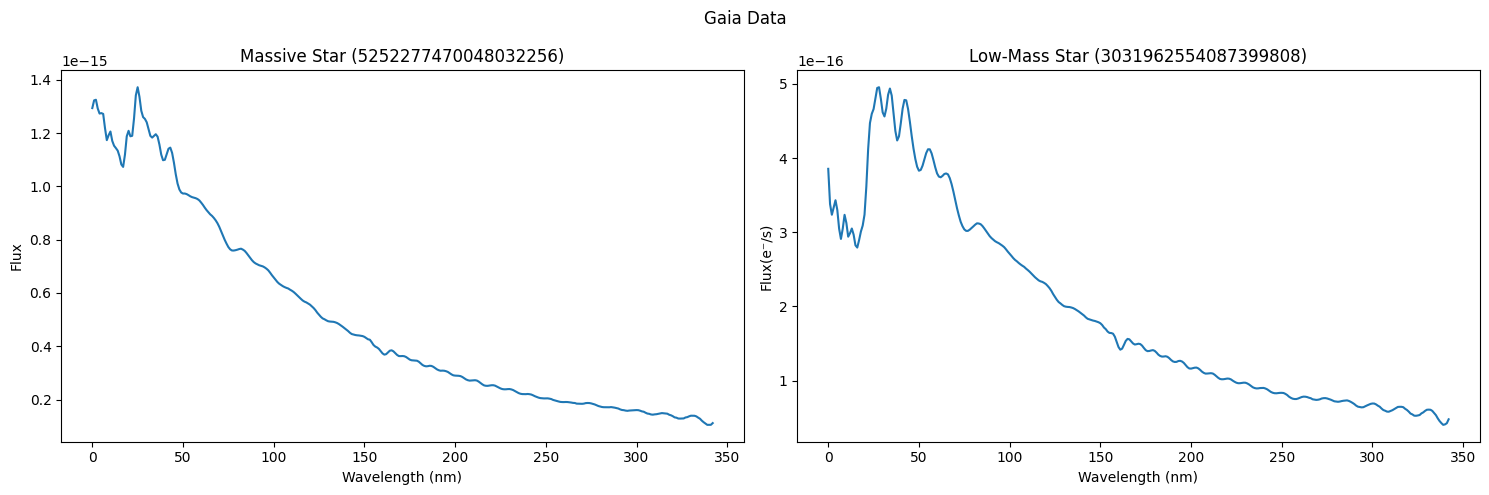

In [48]:
# rerun this cell to see random examples of different spectra


# Random sample from 'M' category (massive star)
sample_ms = data[data['Cat'] == 'M'].sample(n=1).index
flux_ms = data['flux'].iloc[sample_ms].values[0]
object_id_ms = data['source_id'].iloc[sample_ms].values[0]

# Random sample from 'LM' category (low-mass star)
sample_lm = data[data['Cat'] == 'LM'].sample(n=1).index
flux_lm = data['flux'].iloc[sample_lm].values[0]
object_id_lm = data['source_id'].iloc[sample_lm].values[0]

plt.figure(figsize=(15, 5))
plt.suptitle("Gaia Data")

# Plot for 'M' category (massive star)
plt.subplot(1, 2, 1)
plt.plot(flux_ms)
plt.title(f"Massive Star ({object_id_ms})")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Flux')

# Plot for 'LM' category (low-mass star)
plt.subplot(1, 2, 2)
plt.plot(flux_lm)
plt.title(f"Low-Mass Star ({object_id_lm})")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Flux(e⁻/s)')

plt.tight_layout()
plt.show()

## APOGEE Data

In [16]:
data_dir = '../data/APOGEE/training_data.h5'

with h5py.File(data_dir, 'r') as f:
    spectra = f['spectrum'][:]

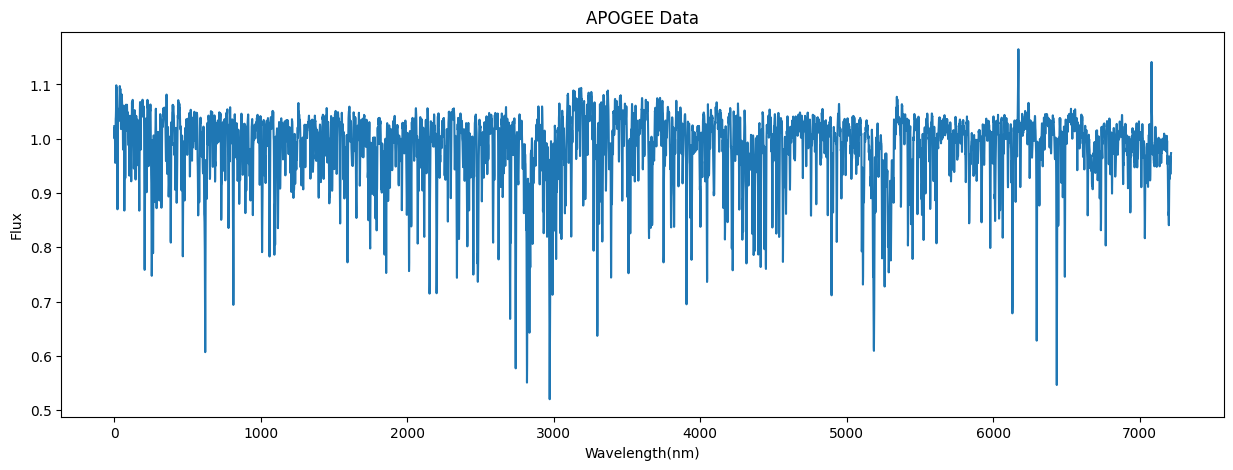

In [49]:
plt.figure(figsize=(15,5))

random_idx = np.random.randint(0, spectra.shape[0])
sample = spectra[random_idx]

plt.plot(sample)
plt.title('APOGEE Data')
plt.xlabel('Wavelength(nm)')
plt.ylabel('Flux')
plt.show()